# Homework 9.3: Hierarchical modeling of repeated experiments (100 pts)

[Data set download](https://s3.amazonaws.com/bebi103.caltech.edu/data/naganathan_explanted_somite_deformability.csv)

<hr>

**You can do either this problem, Homework 8.3, or Homework 8.4. Do not do more than one.**

Somitogenesis is the process by which **somites**, precursors to vertebrae, form sequentially in a developing embryo. The developing zebrafish embryo is an import model system for the study of this process. The video below shows this process.

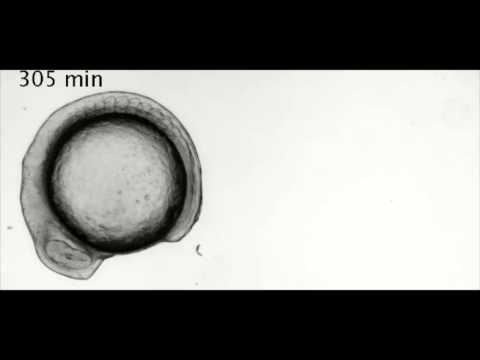

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('aR0CLyGFrxo')

The somites form with near perfect precision, both in time and space. In particular, the shape of each somite is nearly identical, with the somites to the left of the notochord (the spinal cord precursor) having exactly the same shape as the somites on the right.

In a [recent publication](https://doi.org/10.1101/2020.08.14.251645), Naganathan, Popović, and Oates noticed that immediately upon formation, the somites are not perfectly shaped. Rather, their shape gets corrected over time. The authors hypothesized that this correction is achieved via surface tension between the somite and its surroundings. This implies that the somite acts like a liquid drop.

Using a physical theory and careful in vivo measurements that we will not explore in this problem, the authors were able to infer the ratio of the viscosity to the surface tension to be $\eta / \Gamma = 3.78 \pm 0.24$ min/µm. (The error bar is computed by finding a set of MAP parameter values assuming uniform priors in their model and then approximating the posterior locally as Normal and computing a 68% credible region.)

To investigate the idea that the somites behave like liquid droplets and further to provide an independent measurement of the $\eta/\Gamma$ ratio, Naganathan excised individual somites and placed them in buffer. He then imaged them as they rounded up, as a liquid droplet would do. Such a [video](somite_rounding_up.mp4) is below (from the supplement of the paper).

<div style="margin: auto; width: 500px;">
    
<video src="somite_rounding_up.mp4" controls>A somite rounding up</video>
    
</div>

When the somite is first placed in the buffer, is has the shape of a prolate spheroid. Over time, it rounds up to become spherical. [Liciani and coworkers (1997)](https://doi.org/10.1002/(SICI)1099-0488(19970715)35:9%3C1393::AID-POLB9%3E3.0.CO;2-N) worked out a theoretical expression for a prolate spheroid droplet rounding up due to surface tension.

\begin{align}
D(t) = D_0\,\mathrm{e}^{-t/\tau_e},
\end{align}

where $D$ is the deformability, given by $D = (b - a) / (b + a)$, where $a$ and $b$ are respectively the minor and major axes of the prolate spheroid. (Once rounded up, the deformability goes to zero.) They derived that

\begin{align}
\tau_e = \frac{19}{20}\,\frac{\eta R}{\Gamma},
\end{align}

where $R$ is the radius of the sphere of the rounded up droplet. Naganathan used fluorescence imaging and image processing techniques to measure $a$ and $b$ for the explanted somites over time to get a trace of $D$ over time. The volume of a somite is such that the final radius of a spherical somite explant is 31 µm.

You can download the time traces of $D$ versus time for five explanted somites [here](https://s3.amazonaws.com/bebi103.caltech.edu/data/naganathan_explanted_somite_deformability.csv). The data were kindly provided by Sundar Naganathan.

Your task in this problem is to obtain an estimate for $\eta/\Gamma$ for the explants with a goal of comparing that ratio of the one observed in vivo. If they are close, this lends credence to the idea that somites behave like liquid droplets and surface tension does indeed contribute to their shape. You should use a hierarchical model.